# HW 3

The file called train.txt contains two columns of data:
The first column represents the independent variable that we interpret as time and the second column is relative
to the price of some good, say ice cream.

In [1]:
#imports several python libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [2]:
#loads the training data into a pandas dataframe titled tr
tr = pd.read_csv('/Users/noamgal/Downloads/Datasets/train.txt','  ', engine='python', header = None)
tr.columns = ['Time','Price']

There are 800 rows in the dataframe, each of which shows the price of a given good at a specified time. The time variable is the independent variable, and can only increase, while the price is the dependent variable, and fluctuates throughout. 

In general, the price seems to have increased significantly between the beginning and end of the timeline, which suggests that time may be a significant predictor of price.

In [3]:
print(tr.corr())

           Time     Price
Time   1.000000  0.883533
Price  0.883533  1.000000


The training dataset has a strong positive correlation between time and price with a correlation coefficient of 0.883533, which means that a 1% increase in the time value is, on average, reflected by a 0.88% increase in the price. There is a strong relationship between time and price.

In [4]:
print(tr.cov())

            Time      Price
Time   76.045325  18.129025
Price  18.129025   5.536445


Furthermore, the dataset has strong covariance, which also indicates that there is a positive relationship between the time and price of the good, although it does not tell us exactly how strong that relationship is because covariance is not standardized.

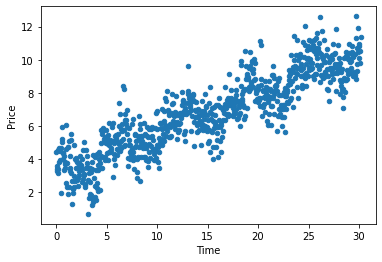

In [5]:
# Visualizes the data as scatterplot using Matplotlib
tr.plot(kind='scatter',x='Time',y='Price')
plt.show()

The relationship between time and price can be seen in the above visualization. The Time variable is shown on the x-axis while the price variable is shown on the y-axis. 

It can be easily seen that the data shows high correlation and strong covariance since the data slopes positively and there are relatively few outliers.

In [6]:
#reshapes time and price into arrays 
time = tr.Time.values.reshape(-1,1)
price = tr.Price.values.reshape(-1,1)

In [7]:
# Selects a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(time, price)

#returns βˆ0 or intercept followed by βˆ1 

lin_reg.intercept_, lin_reg.coef_

(array([3.1910378]), array([[0.23839763]]))

Thus, we have found βˆ0=3.1910378 and βˆ1=0.23839763.

In [8]:
#Creates a pandas dataframe for M to calculate OLS through stats model
M =  pd.DataFrame({"Constant":np.ones(len(time))}).join(pd.DataFrame(time))
#Replicates the regression process using statsmodels for the purpose of creating a statistical summary
est = sm.OLS(price, M)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2840.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):          4.30e-265
Time:                        23:31:40   Log-Likelihood:                -1212.4
No. Observations:                 800   AIC:                             2429.
Df Residuals:                     798   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       3.1910      0.078     40.962      0.0

According to the statsmodel printout, we can be 95% confident that 3.038>βˆ0<3.344 and 0.230>βˆ1<0.247, so we can conclude that neither of these parameters are equal to zero and that there is indeed a linear trend to the data.

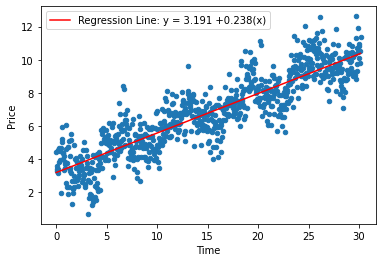

In [9]:
#stores the predicted y-values as an array
ypred = lin_reg.predict(time)
#plots the regression line using the 
tr.plot(kind='scatter',x='Time',y='Price')
plt.plot(time, ypred, 'r-', label = 'Regression Line: y = 3.191 +0.238(x)')
plt.legend()
plt.show()

Above, I have plotted the regression line given by y = 3.191 +0.238(x).

The line captures the positive trend of the data, but since it is linear, it does not capture any of the fluctuations.

In [10]:
#the economist suggested several features
e1 = np.cos(time)
#in e2, log of 0 is encountered
e2 = np.log(time)
e3 = np.cos(4*time)
e4 = np.sin(3*time)
e5 = np.sin(5*time)
e6 = np.sin(2*time)*np.cos(2*time)

<ipython-input-10-cb5363b20577>:4: RuntimeWarning: divide by zero encountered in log
  e2 = np.log(time)


In [11]:
#stores all the usable features into a data frame titled xcolumns
xcolumns = pd.DataFrame(time)
xcolumns.columns = ["time"]
xcolumns["cos(time)"] = e1
'''I removed the log(time) feature labeled above as e2 since it caused an error due to the negative infinity 
value that results from log(0)'''
xcolumns["cos(4*time)"] = e3
xcolumns["sin(3*time)"] = e4
xcolumns["sin(5*time)"] = e5
xcolumns["sin(2*time)*cos(2*time)"] = e6

In [12]:
#stores the results of a forward step-wise feature selection process in a variable titled sfs
sfs = SFS(lin_reg, k_features = 'parsimonious', forward=True, scoring = 'r2', cv = 5, n_jobs = -1)
sfs = sfs.fit(xcolumns, price)
#stores the results of a backward step-wise feature selection process in a variable titled sbs
sbs = SFS(lin_reg, k_features = 'parsimonious', forward=False, scoring = 'r2', cv = 5, n_jobs = -1)
sbs = sbs.fit(xcolumns, price)

In [13]:
#prints out a summary of the results of the forward feature selection utilizing pandas features
forward = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.0034652600554562207, 0.07582502174473149, -...",-0.0711949,"(time,)",0.141814,0.110336,0.055168
2,"(0, 1)","[0.3140652987369107, 0.24672663622993796, 0.16...",0.22483,"(time, cos(time))",0.0787599,0.0612778,0.0306389
3,"(0, 1, 3)","[0.3954639457191206, 0.3035394540000643, 0.202...",0.273156,"(time, cos(time), sin(3*time))",0.124177,0.0966136,0.0483068
4,"(0, 1, 3, 5)","[0.39551407093211866, 0.292780093749999, 0.203...",0.270874,"(time, cos(time), sin(3*time), sin(2*time)*cos...",0.123943,0.0964318,0.0482159
5,"(0, 1, 3, 4, 5)","[0.392803861768962, 0.293211192995099, 0.19514...",0.267795,"(time, cos(time), sin(3*time), sin(5*time), si...",0.123883,0.0963855,0.0481927
6,"(0, 1, 2, 3, 4, 5)","[0.39042996248603157, 0.2911395593834071, 0.19...",0.263595,"(time, cos(time), cos(4*time), sin(3*time), si...",0.12589,0.0979468,0.0489734


In the above figure, the results of the forward selection algorithm are shown. It can be seen that the average r2 score rises until the third model, but after the third model, the models have progressively lower average r2 scores.

Thus, the third model contains the optimal set of features:(time, cos(time), sin(3*time))

In [14]:
#prints out a summary of the results of the backward feature selection utilizing pandas features
backward = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 2, 3, 4, 5)","[0.39042996248603157, 0.2911395593834071, 0.19...",0.263595,"(time, cos(time), cos(4*time), sin(3*time), si...",0.12589,0.0979468,0.0489734
5,"(0, 1, 3, 4, 5)","[0.392803861768962, 0.293211192995099, 0.19514...",0.267795,"(time, cos(time), sin(3*time), sin(5*time), si...",0.123883,0.0963855,0.0481927
4,"(0, 1, 3, 5)","[0.39551407093211866, 0.292780093749999, 0.203...",0.270874,"(time, cos(time), sin(3*time), sin(2*time)*cos...",0.123943,0.0964318,0.0482159
3,"(0, 1, 3)","[0.3954639457191206, 0.3035394540000643, 0.202...",0.273156,"(time, cos(time), sin(3*time))",0.124177,0.0966136,0.0483068
2,"(0, 1)","[0.3140652987369107, 0.24672663622993796, 0.16...",0.22483,"(time, cos(time))",0.0787599,0.0612778,0.0306389
1,"(0,)","[0.0034652600554562207, 0.07582502174473149, -...",-0.0711949,"(time,)",0.141814,0.110336,0.055168


Above, I have replicated the feature selection process but using backward selection. THe optimal set is again that which contains the three best features: (time, cos(time), sin(3*time))

In [15]:
#iterates through all 6 optimal feature sets, and prints the adjusted r2 score for each
for index, row in forward.iterrows():
    n = xcolumns.shape[0]
    r2 = row['avg_score']
    k = len(row['feature_names'])
    feats = row['feature_names']
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
    print(f'The adjusted r squared for {feats} is {adj_r2}')

The adjusted r squared for ('time',) is -0.07253720126990215
The adjusted r squared for ('time', 'cos(time)') is 0.22288458432570635
The adjusted r squared for ('time', 'cos(time)', 'sin(3*time)') is 0.27041695805252464
The adjusted r squared for ('time', 'cos(time)', 'sin(3*time)', 'sin(2*time)*cos(2*time)') is 0.26720495398066935
The adjusted r squared for ('time', 'cos(time)', 'sin(3*time)', 'sin(5*time)', 'sin(2*time)*cos(2*time)') is 0.26318430940232274
The adjusted r squared for ('time', 'cos(time)', 'cos(4*time)', 'sin(3*time)', 'sin(5*time)', 'sin(2*time)*cos(2*time)') is 0.2580235415301593


As we can see from the above calculations, the highest adjusted R^2 score of 0.27 comes from the model that uses the following 3 features: time, cos(time), and sin(3*time).

Both forward and backward feature selection picked these three features.


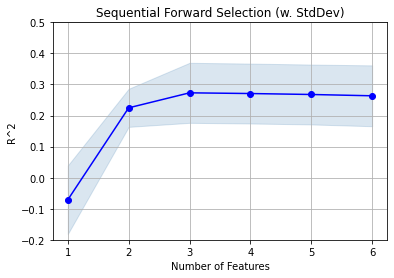

In [16]:
fig = plot_sfs(sfs.get_metric_dict(), ylabel='R^2')
plt.ylim([-0.2, 0.5])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Above I have plotted the R^2 for each of the optimal feature sets including a 95% confidence interval.

It can be seen that the R^2 is highest when using the three best features: ('time', 'cos(time)', 'sin(3*time)')

In [17]:
#stores the predicted y-values as an array
selected = pd.DataFrame(xcolumns["time"])
selected.columns = ["time"]
selected["cos(time)"] = xcolumns["cos(time)"] 
selected["sin(3*time)"] = xcolumns["sin(3*time)"]

#fits the selected features into a linear regression model, and prints out the beta values
lin_reg.fit(selected, price)
lin_reg.intercept_, lin_reg.coef_

(array([3.12541531]), array([[0.2439003 , 0.80723531, 0.37146641]]))

Above, I have printed out the beta values for the three optimal features, which are roughly βˆ0=3.125, βˆ1=0.24, βˆ2=0.8, βˆ3=0.37, which gives the following line: y = 3.125 +0.24(x)+0.8cos(x)+0.37sin(3x)

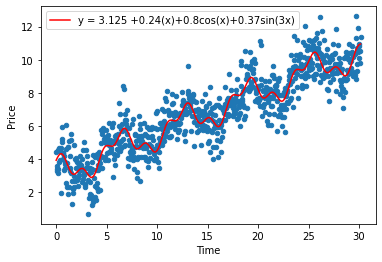

In [18]:
ypred = lin_reg.predict(selected)

#plots the regression line using the three optimal features
tr.plot(kind='scatter',x='Time',y='Price')
plt.plot(time, ypred, 'r-', label = 'y = 3.125 +0.24(x)+0.8cos(x)+0.37sin(3x)')
plt.legend()
plt.show()

Above, I have plotted the regression line through the training data using the formula  y = 3.125+0.24(x)+0.8cos(x)+0.37sin(3x) that was found by performing feature selection, and then running a regression analysis on the optimal feature set.

The line appears to do a good job at fitting the data, moving up to catch the upswings in price, and down to catch the downturns.

In [19]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(xcolumns, price)
ridge_reg.coef_, ridge_reg.intercept_

(array([[ 0.24393897,  0.80561641, -0.02248138,  0.37007152,  0.02085432,
         -0.03244696]]),
 array([3.12510304]))

Above, I have printed out the beta values given by the ridge regression which are roughly βˆ0=3.125, βˆ1=0.24, βˆ2=0.8, βˆ3=-0.02, βˆ4=0.37, βˆ5= 0.02, βˆ6=-0.03

y = 3.125 +0.24(x)+0.8cos(x)-0.02cos(4x)+0.37sin(3x)+0.02sin(5x)+0.03sin(2x)cos(2x)

Ridge regression always keeps all features, but still, the algorithm set the beta values for the suboptimal features very close to zero as can be seen by  βˆ3=-0.02, βˆ5= 0.02, and βˆ6=-0.03. 

Moreover, the beta values for the three optimal features are almost identical to those found by performing a standard regression of just the three optimal features. The ridge regression results confirm the results of the feature selection process.

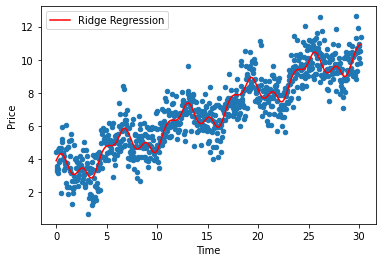

In [20]:
ridgeYpred = ridge_reg.predict(xcolumns)

#plots the regression line using the 
tr.plot(kind='scatter',x='Time',y='Price')
plt.plot(time, ridgeYpred, 'r-', label = 'Ridge Regression')
plt.legend()
plt.show()

Unsurprisingly, the ridge regression line plotted looks very similar to the regression line plotted as a result of the feature selection.

In [21]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(xcolumns, price)
lasso_reg.intercept_, lasso_reg.coef_

(array([3.16390851]),
 array([ 0.24120046,  0.60938265, -0.        ,  0.17936327,  0.        ,
        -0.        ]))

Above, I have printed out the beta values given by the Lasso Regression. βˆ0=3.16, βˆ1=0.24, βˆ2=0.6, βˆ3=0, βˆ4=0.17, βˆ5=0, βˆ6=0.

The lasso regression deleted the three suboptimal features entirely by setting their beta values to zero as can be seen by βˆ3=0, βˆ5=0 and βˆ6=0.

For the three optimal features, the lasso regression found somewhat different beta values than the ridge regression and noraml linear regression. Specifically, the βˆ2=0.6 and βˆ4=0.17 are a lot lower than they were in the previous models.

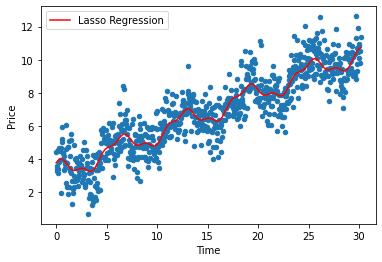

In [22]:
lassoYpred = lasso_reg.predict(xcolumns)

#plots the regression line using the 
tr.plot(kind='scatter',x='Time',y='Price')
plt.plot(time, lassoYpred, 'r-', label = 'Lasso Regression')
plt.legend()
plt.show()

Above I have plotted the lasso regression line. It does resemble the previous graphs, but the line does not fit the data as strongly, so it is either underfitting the dataset or the previous models were overfitting.

In [23]:
#loads the testing data into a variable titled tst
tst = pd.read_csv('/Users/noamgal/Downloads/Datasets/test.txt','  ', engine = 'python', header = None)
tst.columns = ['Time','Price']

In [24]:
#creates a pandas data frame with the xcolumns including all three optimal features
testX = tst.Time.values.reshape(-1,1)
testY = tst.Price.values.reshape(-1,1)
costestX = np.cos(testX)
sin3testX = np.sin(3*testX)
testXcolumns = pd.DataFrame(testX)
testXcolumns.columns = ['time']
testXcolumns['cos(time)'] = costestX
testXcolumns['sin(3*time)'] = sin3testX

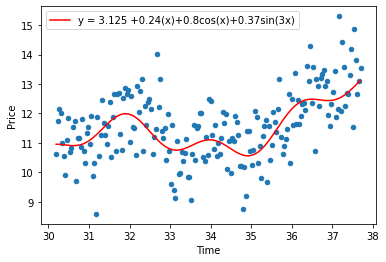

In [25]:
testYpred = lin_reg.predict(testXcolumns)
#plots the regression line using the 
tst.plot(kind='scatter',x='Time',y='Price')
plt.plot(testX, testYpred, 'r-', label = 'y = 3.125 +0.24(x)+0.8cos(x)+0.37sin(3x)')
plt.legend()
plt.show()

Above is plotted a line using the model created earlier through feature selection and linear regression utilizing the training data. Now, the same model is being applied to the test data. 

The model appears to still give a decent fit of the test data.

In [26]:
lin_mse = mean_squared_error(testY,testYpred)
print(f"Mean Squared Error is {lin_mse}")
#MSE = (sum((price-predictions)**2))/(len(M)-len(M.columns))

Mean Squared Error is 0.7830993866509383


In [27]:
n = testX.shape[0]
r2 = r2_score(testY, testYpred)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - 3 - 1))
print(f'The adjusted r squared is {adj_r2}')

The adjusted r squared is 0.4157835947290107


I observe a good agreement between the model and the test data. The adjusted r squared score is reasonably high at roughly 0.4. The Mean Squared Error is fairly low at roughly 0.8.